In [148]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from datetime import datetime

# Import the file 
Disney_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\DisneyHistoricalStockPriceData.csv")

Robinhood_df = pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Disney-Stock-Data\Resources\Disney Robinhood Data.csv")

Robinhood_df["timestamp"].astype(str)

Robinhood_df['Time']=""

Robinhood_df[['Date','Time']] = Robinhood_df.timestamp.str.split(" ",expand=True)

Robinhood_df[['Month','Day','Year']]=Robinhood_df.Date.str.split("/",expand=True)

Robinhood_df

,timestamp,users_holding,Time,Date,Month,Day,Year
0,5/2/2018 4:56,59936,4:56,5/2/2018,5,2,2018
1,5/2/2018 6:41,59936,6:41,5/2/2018,5,2,2018
2,5/3/2018 0:38,59950,0:38,5/3/2018,5,3,2018
3,5/3/2018 6:36,59950,6:36,5/3/2018,5,3,2018
4,5/3/2018 6:51,59950,6:51,5/3/2018,5,3,2018
...,...,...,...,...,...,...,...
14910,2/17/2020 4:50,218542,4:50,2/17/2020,2,17,2020
14911,2/17/2020 5:50,218542,5:50,2/17/2020,2,17,2020
14912,2/17/2020 6:50,218542,6:50,2/17/2020,2,17,2020
14913,2/17/2020 7:50,218542,7:50,2/17/2020,2,17,2020


In [160]:
# Change the date column to datetime in order to have harmony with the disney stock price data
# Robinhood_df['Date']=pd.to_datetime(Robinhood_df['Date'])

# In order to work with less rows and get one data point for each day, we can groupby the date
# Less rows = less parsing = less processing = increased efficiency
Robinhood_df.groupby('Date').mean()


,users_holding
Date,
2018-05-02,59936.000000
2018-05-03,60186.421053
2018-05-04,60319.166667
2018-05-05,60117.666667
2018-05-06,60119.000000
...,...
2020-02-13,217738.500000
2020-02-14,217944.583333
2020-02-15,218546.208333


In [150]:
# CLEANING THE DISNEY STOCK DATA
# Pass in a list to name the header
Disney_df.columns = ["date","open","high","low","close","volume"]

# Delete the previous row by deleting rows with the word "open"
Disney_cleaned = Disney_df[Disney_df["open"] != "Open"]


# Pulling just the dates along with the close 
Disney_cleaned_short = Disney_cleaned[["date","close"]]
Disney_cleaned_short.rename(index=str)

Disney_cleaned_short

,date,close
1,6/18/2020,118.37
2,6/17/2020,117.65
3,6/16/2020,118.44
4,6/15/2020,117.08
5,6/12/2020,115.49
...,...,...
12529,6/7/1972,1.69
12530,6/6/1972,1.68
12531,6/5/1972,1.68
12532,6/2/1972,1.68


In [162]:
# Import a column that shows the change between the open and close price for the day

# Pass in the columns to be subtracted as integers with pandas
Disney_cleaned["Change"] = pd.to_numeric(Disney_cleaned["open"]) - pd.to_numeric(Disney_cleaned["close"])

# Change date column to datetime so data is uniform
# Disney_cleaned['date']=pd.to_datetime(Disney_cleaned['date'])

# Change datetime in shortened disney dataframe
# Disney_cleaned_short['date']=pd.to_datetime(Disney_cleaned_short['date'])

Disney_cleaned_short_final = Disney_cleaned_short[:-11900]
Disney_cleaned_final = Disney_cleaned[:-11900]
Disney_cleaned_final

,date,open,high,low,close,volume,Change
1,2020-06-18,116.88,118.53,115.93,118.37,9562491,-1.49
2,2020-06-17,118.64,119.23,117.14,117.65,8921557,0.99
3,2020-06-16,121.24,121.5,116.05,118.44,12951190,2.80
4,2020-06-15,112.08,118.12,111.71,117.08,14156378,-5.00
5,2020-06-12,115.17,117,112.89,115.49,18361940,-0.32
...,...,...,...,...,...,...,...
629,2018-01-22,110.27,111.56,110.06,111.1,8073624,-0.83
630,2018-01-19,110.97,111.09,109.84,110.59,10514262,0.38
631,2018-01-18,111.74,111.99,110.2,110.42,8070928,1.32
632,2018-01-17,111.2,112.21,110.57,111.97,7030711,-0.77


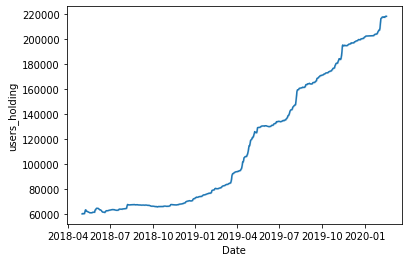

In [159]:
sns.lineplot(Robinhood_df['Date'],Robinhood_df['users_holding'])

In [176]:
Disney_cleaned_final.date.values.astype(int)
sns.lineplot(Disney_df['date'],Disney_df['close'])

DataError: No numeric types to aggregate